# Tanguy Pellerin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy.linalg import inv

In [2]:
df = pd.read_csv("Bike Rental UCI dataset.csv")
df.dropna()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0000,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0000,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0000,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0000,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0000,Sat,0,1
5,1,0,1,5,0,0,2,0.24,0.75,0.0896,Sat,0,1
6,1,0,1,6,0,0,1,0.22,0.80,0.0000,Sat,0,2
7,1,0,1,7,0,0,1,0.20,0.86,0.0000,Sat,0,3
8,1,0,1,8,0,0,1,0.24,0.75,0.0000,Sat,0,8
9,1,0,1,9,0,0,1,0.32,0.76,0.0000,Sat,0,14


In [3]:
df.describe()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,days,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,0.682721,1.425283,0.496987,0.627229,0.190098,361.562576,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,0.465431,0.639357,0.192556,0.192930,0.122340,209.042828,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.480000,0.104500,181.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.630000,0.194000,362.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.780000,0.253700,543.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.850700,724.000000,977.000000


# Feature Engineering

In [4]:
X = df.drop("demand", axis=1)
y = df.demand
X.dayOfWeek = X.dayOfWeek.astype('category')
X["day"] = X.dayOfWeek.cat.codes
X = X.drop("dayOfWeek",axis=1)
X.drop(columns={"days", "yr", "mnth", "hr"}, inplace=True)


# Gradient descent

In [5]:
def cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


def gradient(X,y,theta,learning_rate,iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,X.shape[1]))
    for i in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[i,:] =theta.T
        cost_history[i]  = cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [6]:
learning_rate = 0.08
iteration = 2000
theta = np.array([0]*X.shape[1])
theta,cost_history,theta_history = gradient(X,y,theta,learning_rate,iteration)

In [7]:
print(theta)
print("\n\nR2 : ",metrics.r2_score(X.dot(theta), y))

season         25.636248
holiday        -2.897566
workingday     15.535063
weathersit     13.694641
temp          384.976663
hum          -214.369923
windspeed     144.046653
day             2.155402
dtype: float64


R2 :  -1.5559385047855843


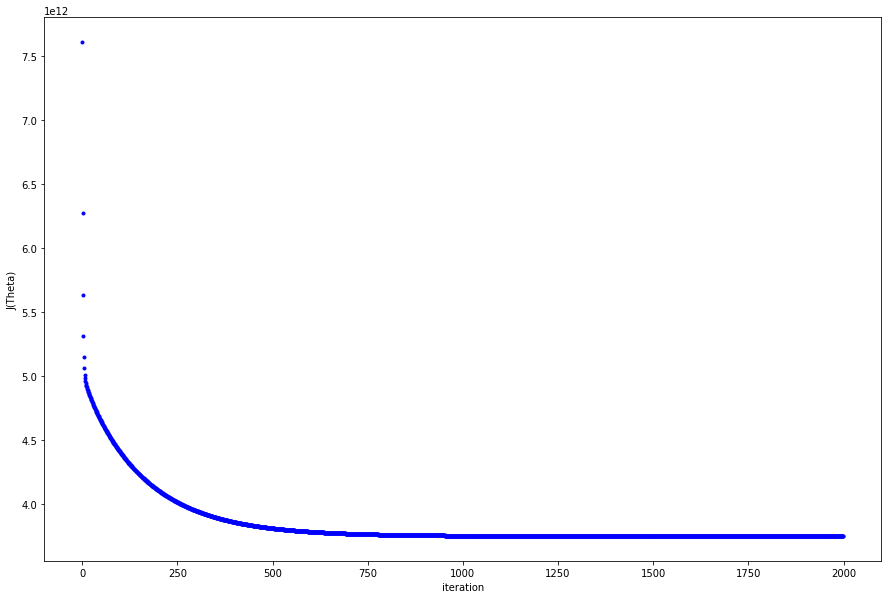

In [8]:
plt.figure(figsize=(15,10))
plt.xlabel("iteration")
plt.ylabel("J(Theta)")
plt.plot(range(iteration),cost_history,'b.')

# Normal equation

In [9]:
def normal_equation(X, y):   
    return inv(X.T.dot(X)).dot(X.T).dot(y)   

theta = normal_equation(X,y)
print(theta)
print("\n\nR2 : ",metrics.r2_score(X.dot(theta), y))

[  25.6395504    -3.3123873    15.45934579   13.84354274  385.62955221
 -215.49085816  145.33451687    2.1498338 ]


R2 :  -1.5442102858610371


# Scikit learn

## Train test split

In [10]:
Xdf = df
Xdf.dayOfWeek = Xdf.dayOfWeek.astype('category')
Xdf["day"] = Xdf.dayOfWeek.cat.codes
Xdf = Xdf.drop(["dayOfWeek", "demand"],axis=1)
ydf = df.demand

X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, train_size=0.8)

/Users/romane/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Linear Regression

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = model.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score : ",model.score(X_test, y_test)*100)

Root Mean Squared Error: 140.4787572881296
Score :  39.462802154445875


## Random Forest

In [13]:
model = RandomForestRegressor(n_estimators=400, max_depth=8)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
y_pred = model.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score",model.score(X_test,y_test)*100)

Root Mean Squared Error: 63.66775896790625
Score 87.56516210745603
